In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import *
from sklearn.linear_model import LinearRegression

1. Оценить коэффициент корреляции Пирсона 𝑟(𝑥, 𝑦) между двумя переменными в первом и втором столбце

In [2]:
x = []
y = []

In [3]:
with open("/content/1.txt",'r') as file1:
    for i in file1:
        temp = i.split(',')
        x.append(float(temp[0]))
        y.append(float(temp[1]))

In [4]:
sred_x = sum(x) / len(x)
sred_y = sum(y) / len(y)
sred_xy = sum([x * y for x, y in zip(x, y)]) / len(x)
s_x = (sum(i ** 2 - sred_x ** 2 for i in x) / len(x)) ** 0.5
s_y = (sum(j ** 2 - sred_y ** 2 for j in y) / len(y)) ** 0.5
r = (sred_xy - sred_x * sred_y) / (s_x * s_y)
print("Коэффициент корреляции Пирсона:", r)

Коэффициент корреляции Пирсона: 0.9837478356281872


2. По шкале Чеддока оценить характеристику корреляционной связи между величинами

In [5]:
if abs(r) < 0:
    print("Слабая связь")
elif abs(r) < 0.3:
    print("Умеренная связь")
elif abs(r) < 0.7:
    print("Заметная связь")
elif abs(r) < 0.9:
    print("Высокая связь")
else:
    print("Весьма высокая связь")

Весьма высокая связь


3. Проверить статистическую значимость коэффициента корреляции Пирсона с помощью 𝑡-статистики

In [6]:
t = r * ((len(x) - 2) / (1 - r ** 2)) ** 0.5
print("Критерий Стьюдента (t):", t)
print("Критерий Стьюдента табличный (t)", scipy.stats.t.ppf(1-0.05 / 2, len(x) - 2))
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(x) - 2) < t)

Критерий Стьюдента (t): 54.23729126263767
Критерий Стьюдента табличный (t) 1.984467454426692
True


4. Построить линейную регрессию между столбцами, оценить значение коэффициентов линейной зависимости

2.407560361275928 -2.343587204139169


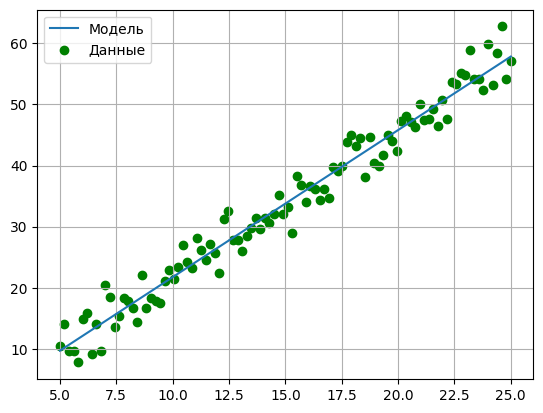

In [7]:
a1 = r * s_y / s_x
b1 = sred_y - a1 * sred_x
print(a1, b1)
xf = np.linspace(5, 25, 100)
yf = a1 * xf + b1
plt.plot(xf, yf)
plt.scatter(x, y, c='green')
plt.grid()
plt.legend(['Модель', 'Данные'])
plt.show()

5. Оценить адекватность модели с использованием критерия Фишера

In [8]:
d_theta1 = 2

S2_mod1 =  sum((i - j) ** 2 for i, j in zip(y, yf)) / (len(y) - d_theta1)

S2_total1 = sum((e - sred_y) ** 2 for e in y) / (len(y) - 1)

S2_M1 = min(S2_mod1, S2_total1)
S2_B1 = max(S2_mod1, S2_total1)

F1 = S2_B1 / S2_M1

print("Критерий Фишера (F):", F1)
print("Критерий Фишера табличный(F):", scipy.stats.f.ppf(0.05, len(x) - 2, len(x) - 1))
print(scipy.stats.f.ppf(0.05, len(x) - 2, len(x) - 1) < F1)

Критерий Фишера (F): 30.703876399069895
Критерий Фишера табличный(F): 0.7165989462583362
True


6. Оценить значимость полученных коэффициентов линейной регрессии

In [9]:
ma1 = (S2_mod1) ** 0.5 / (s_x * (len(x)) ** 0.5)
mb1 = ((S2_mod1) * (sum(x ** 2 for x in x))) ** 0.5 / (s_x * len(x))

Ta1 = a1 / ma1
Tb1 = b1 / mb1

print(Ta1)
print(Tb1)
print("Критерий Стьюдента  табличный (t)", scipy.stats.t.ppf(1 - 0.05 / 2, len(x) - 2))
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(x) - 2) < Ta1)
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(x) - 2) < Tb1)

54.23729126263516
-3.280548007976656
Критерий Стьюдента  табличный (t) 1.984467454426692
True
False


7. Построить доверительные интервалы для полученных коэффициентов

2.31947105832043 2.495649664231426 -3.761268799383825 -0.9259056088945128


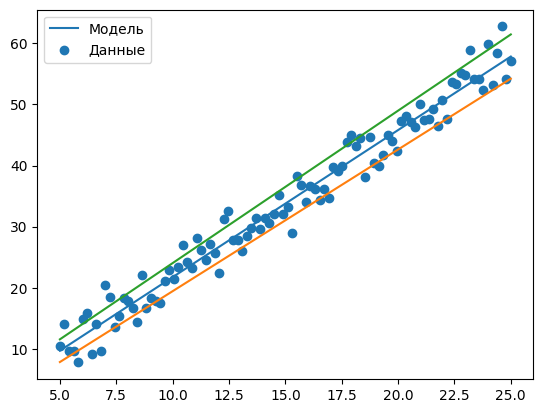

In [10]:
af1 = a1 - scipy.stats.t.ppf(1-0.05/2, len(x)-2)*ma1
af2 = a1 + scipy.stats.t.ppf(1-0.05/2, len(x)-2)*ma1
bf1 = b1 - scipy.stats.t.ppf(1-0.05/2, len(x)-2)*mb1
bf2 = b1 + scipy.stats.t.ppf(1-0.05/2, len(x)-2)*mb1
print(af1, af2, bf1, bf2)

plt.plot(xf, yf)
plt.scatter(x, y)
plt.legend(['Модель', 'Данные'])
plt.plot(xf, af1*xf+bf1)
plt.plot(xf, af2*xf+bf2)
plt.show()

8. Оценить интервал прогноза для линейной модели на 𝜟𝒙 = 3 значения вперед

In [11]:
xi = 25.6
yi = a1*xi+b1
E = scipy.stats.t.ppf(1-0.05/2, len(x)-2)*(S2_mod1*(1+1/len(x)+(xi-sred_x)**2/(len(x)*s_x)))**0.5
print('[', yi-E, ';', yi+E, ']', sep='')

[53.656434809936066;64.92348127911312]


1. С помощью теста Чоу обосновать необходимость деления выборки по одной из качественных факторных переменных. Произвести разбиение и построить две линейные регрессии, оценить коэффициенты моделей.

In [12]:
x2 = []
b2 = []
d2 = []
y2 = []

In [13]:
with open("/content/2.txt",'r') as file1:
    for i in file1:
        temp = i.split(',')
        x2.append(float(temp[0]))
        b2.append(float(temp[1]))
        d2.append(float(temp[2]))
        y2.append(float(temp[3]))

In [14]:
df = pd.DataFrame({'x': x2, 'y': y2, 'd': b2})
df1 = df[df['d'] == 0]
df2 = df[df['d'] == 1]

In [15]:
xd1 = np.array(df['x'])
yd1 = np.array(df['y'])
reg1 = LinearRegression().fit(xd1.reshape((-1, 1)), yd1)
yp1 = reg1.predict(xd1.reshape((-1, 1)))

xd2 = np.array(df1['x'])
yd2 = np.array(df1['y'])
reg2 = LinearRegression().fit(xd2.reshape((-1, 1)), yd2)
yp2 = reg2.predict(xd2.reshape((-1, 1)))

xd3 = np.array(df2['x'])
yd3 = np.array(df2['y'])
reg3 = LinearRegression().fit(xd3.reshape((-1, 1)), yd3)
yp3 = reg3.predict(xd3.reshape((-1, 1)))

print(reg2.coef_[0], reg2.intercept_)
print(reg3.coef_[0], reg3.intercept_)

2.3190864640698567 1.6959299168928865
1.3086293145807264 0.3573450459105949


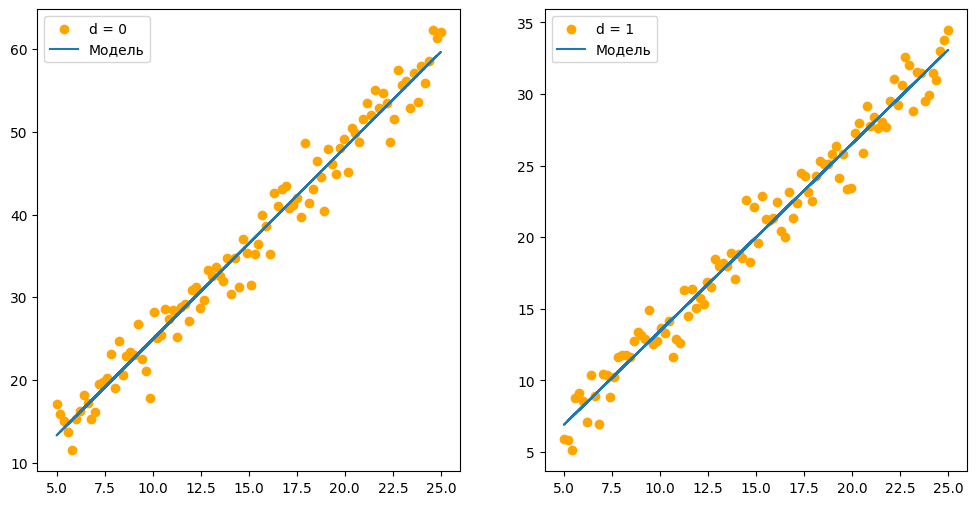

In [16]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.scatter(xd2, yd2, color = 'orange')
plt.plot(xd2, yp2)
plt.legend(['d = 0', 'Модель'])
plt.subplot(1, 2, 2)
plt.scatter(xd3, yd3, color = 'orange')
plt.plot(xd3, yp3)
plt.legend(['d = 1', 'Модель'])
plt.show()

In [17]:
RSS = sum((y-y1)**2 for y, y1 in zip(yd1, yp1))
RSS1 = sum((y-y1)**2 for y, y1 in zip(yd2, yp2))
RSS2 = sum((y-y1)**2 for y, y1 in zip(yd3, yp3))

In [18]:
F = ((RSS - RSS1 - RSS2)/2)/((RSS1 + RSS2)/(len(xd1)-2*2))
print(F)
print(scipy.stats.f.ppf(0.95, 2, len(xd1)-2*2))
print(F > scipy.stats.f.ppf(0.95, 2, len(xd1)-2*2))

2240.60078345355
3.0419902345156493
True


In [19]:
df = pd.DataFrame({'x': x2, 'y': y2, 'd': d2})
df1 = df[df['d'] == 0]
df2 = df[df['d'] == 1]

In [20]:
xd1 = np.array(df['x'])
yd1 = np.array(df['y'])
reg1 = LinearRegression().fit(xd1.reshape((-1, 1)), yd1)
yp1 = reg1.predict(xd1.reshape((-1, 1)))

xd2 = np.array(df1['x'])
yd2 = np.array(df1['y'])
reg2 = LinearRegression().fit(xd2.reshape((-1, 1)), yd2)
yp2 = reg2.predict(xd2.reshape((-1, 1)))

xd3 = np.array(df2['x'])
yd3 = np.array(df2['y'])
reg3 = LinearRegression().fit(xd3.reshape((-1, 1)), yd3)
yp3 = reg3.predict(xd3.reshape((-1, 1)))

print(reg2.coef_[0], reg2.intercept_)
print(reg3.coef_[0], reg3.intercept_)

1.9053856774117746 -0.07807157474107385
1.7503005315059166 1.8898463264875431


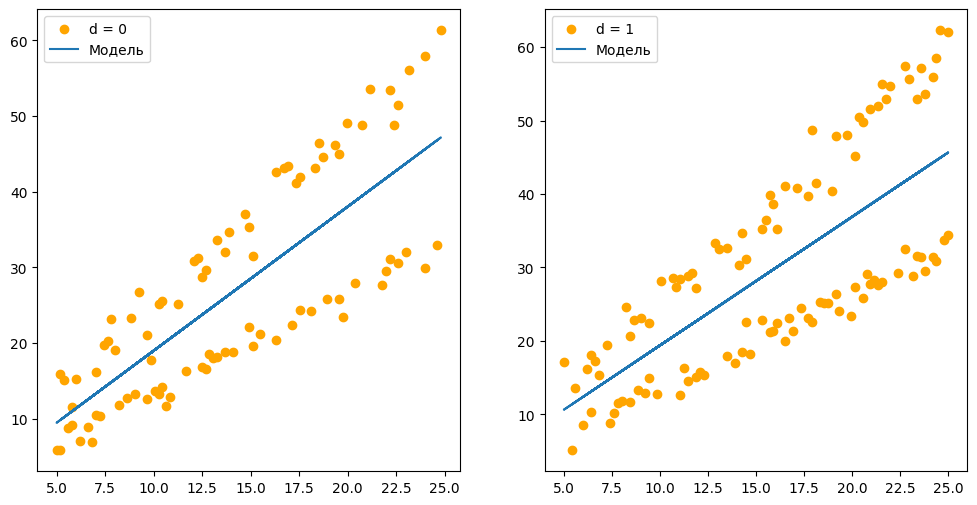

In [21]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.scatter(xd2, yd2, color = 'orange')
plt.plot(xd2, yp2)
plt.legend(['d = 0', 'Модель'])
plt.subplot(1, 2, 2)
plt.scatter(xd3, yd3, color = 'orange')
plt.plot(xd3, yp3)
plt.legend(['d = 1', 'Модель'])
plt.show()

In [22]:
RSS = sum((y-y1)**2 for y, y1 in zip(yd1, yp1))
RSS1 = sum((y-y1)**2 for y, y1 in zip(yd2, yp2))
RSS2 = sum((y-y1)**2 for y, y1 in zip(yd3, yp3))

In [23]:
F = ((RSS - RSS1 - RSS2)/2)/((RSS1 + RSS2)/(len(xd1)-2*2))
print(F)
print(scipy.stats.f.ppf(0.95, 2, len(xd1)-2*2))
print(F > scipy.stats.f.ppf(0.95, 2, len(xd1)-2*2))

0.2725076291641063
3.0419902345156493
False


1. Построить линейную регрессию, оценить значения коэффициентов модели.

In [24]:
w = []
z = []

In [25]:
with open("/content/3.txt",'r') as file1:
    for i in file1:
        temp = i.split(',')
        w.append(float(temp[0]))
        z.append(float(temp[1]))

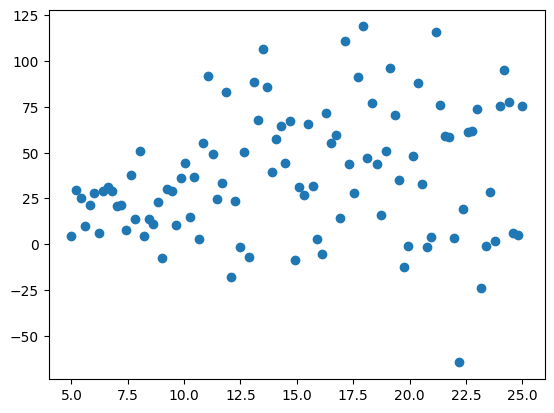

In [26]:
plt.scatter(w, z)

In [27]:
sax3 = sum(w) / len(w)
say3 = sum(z) / len(z)
sa3 = sum([x * y for x, y in zip(w, z)]) / len(w)
sdx3 = (sum(x ** 2 - sax3 ** 2 for x in w) / len(w)) ** 0.5
sdy3 = (sum(y ** 2 - say3 ** 2 for y in z) / len(z)) ** 0.5
r3 = (sa3-sax3*say3) / (sdx3*sdy3)
print(r3)

0.19352142324127178


In [28]:
t3 = r3 * ((len(w) - 2) / (1 - r3 ** 2)) ** 0.5
print("Критерий Стьюдента (t):", t3)
print("Критерий Стьюдента  табличный (t)", scipy.stats.t.ppf(1 - 0.05 / 2, len(x) - 2))
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(x) - 2) < t3)

Критерий Стьюдента (t): 1.9526776711403289
Критерий Стьюдента  табличный (t) 1.984467454426692
False


1.1371651922687598 20.59876940378577


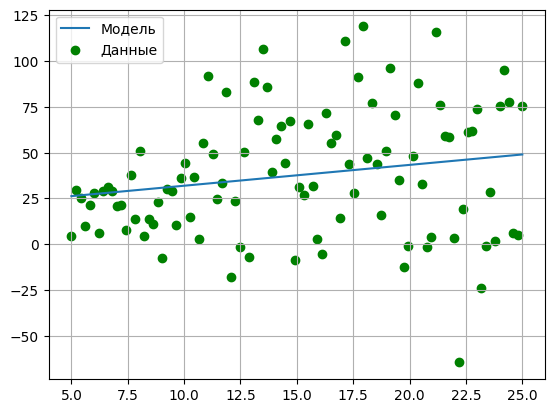

In [29]:
a3 = r3 * sdy3 / sdx3
b3 = say3 - a3 * sax3
print(a3, b3)

xt = np.linspace(5, 25, 100)
yt = a3 * xt + b3
plt.plot(xt, yt)
plt.scatter(w, z, c='green')
plt.grid()
plt.legend(['Модель', 'Данные'])
plt.show()

2. Оценить значимость полученных коэффициентов и адекватность модели.

In [30]:
d_theta3 = 2

S2_mod3 =  sum((yn - yp) ** 2 for yn, yp in zip(z, yt)) / (len(z) - d_theta3)

S2_total3 = sum((y - say3) ** 2 for y in z) / (len(z) - 1)

S2_M3 = min(S2_mod3, S2_total3)
S2_B3 = max(S2_mod3, S2_total3)

F3 = S2_B3 / S2_M3

print("Критерий Фишера (F):", F3)
print("Критерий Фишера табличный(F):", scipy.stats.f.ppf(0.05, len(w) - 2, len(w) - 1))
print(scipy.stats.f.ppf(0.05, len(w) - 2, len(w) - 1) < F3)

Критерий Фишера (F): 1.028413637246161
Критерий Фишера табличный(F): 0.7165989462583362
True


In [31]:
ma3 = (S2_mod3) ** 0.5 / (sdx3 * (len(w)) ** 0.5)
mb3 = ((S2_mod3) * (sum(x ** 2 for x in w))) ** 0.5 / (sdx3 * len(w))

Ta3 = a3 / ma3
Tb3 = b3 / mb3

print(Ta3)
print(Tb3)
print("Критерий Стьюдента  табличный (t)", scipy.stats.t.ppf(1 - 0.05 / 2, len(w) - 2))
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(w) - 2) < Ta3)
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(w) - 2) < Tb3)

1.9526776711403286
2.1978231844738296
Критерий Стьюдента  табличный (t) 1.984467454426692
False
True


3. Двумя способами (тест Спирмена и тест Гольдфельда-Квандта) определить, присутствует ли в данных гетероскедастичность

In [32]:
# Тест Спирмена
# Рассчитываем остатки моделя
e = [yi - yxi for yi, yxi in zip(z, yt)]
print(e[0:5])

[-21.904027214228357, 3.352195943134184, -1.4646835681240908, -16.820437253018717, -5.623089882632531]


In [33]:
data = pd.DataFrame({'x': w, 'y': z, 'e': e})
data['rangX'] = data['x'].rank()
data['rangE'] = data['e'].rank()
data.head()

,x,y,e,rangX,rangE
0,5.000000,4.380568,-21.904027,1.0,24.0
1,5.202020,29.866522,3.352196,2.0,56.0
2,5.404040,25.279372,-1.464684,3.0,47.0
3,5.606061,10.153349,-16.820437,4.0,31.0
4,5.808081,21.580427,-5.623090,5.0,45.0


In [34]:
rs = 1 - 6 * sum([(data['rangE'][i] - data['rangX'][i]) ** 2 for i in range(len(w))]) / (len(w) * ((len(w)) ** 2 - 1))
ts = rs * (len(w) - 1) ** 0.5
print("t:", ts)
print("Табличный t:", scipy.stats.t.ppf(1 - 0.05 / 2, len(w) - 2))
print(scipy.stats.t.ppf(1 - 0.05 / 2, len(w) - 2) < ts) # => Гетероскедастичность присутствует.

t: 0.49603094074298254
Табличный t: 1.984467454426692
False


In [35]:
rs

0.049852985298529884

In [36]:
# Тест Гольдфельда-Квандта
m = round(3 * len(w) / 8)
print(m)

38


In [37]:
w1 = w[0:38]
z1 = z[0:38]
w2 = w[-38:]
z2 = z[-38:]

In [38]:
sax31 = sum(w1)/len(w1)
say31 = sum(z1)/len(z1)
sa31 = sum([x*y for x, y in zip(w1, z1)])/len(w1)
sdx31 = (sum(x**2-sax31**2 for x in w1)/len(w1))**0.5
sdy31 = (sum(y**2-say3**2 for y in z)/len(z1))**0.5
r31 = round((sa31-sax31*say31)/(sdx31*sdy31), 4)
print(r31)

0.0799


In [39]:
t31 = r31*((len(w1)-2)/(1-r31**2))**0.5
print("Критерий Стьюдента (t):", t31)
print("Критерий Стьюдента  табличный (t)", scipy.stats.t.ppf(1-0.05/2, len(x)-2))
print(scipy.stats.t.ppf(1-0.05/2, len(x)-2) < t31)

Критерий Стьюдента (t): 0.48093761322987405
Критерий Стьюдента  табличный (t) 1.984467454426692
False


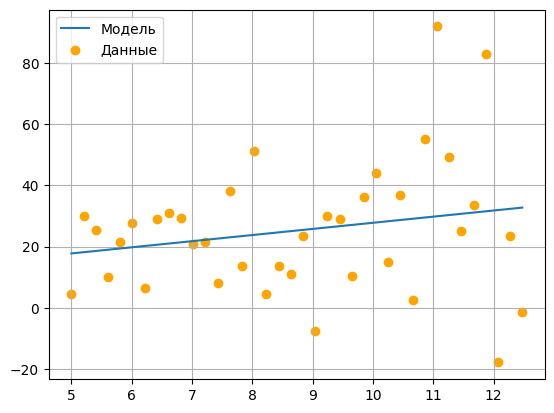

In [40]:
a31 = r31*sdy31/sdx31
b31 = say31 - a31*sax31

xt = np.linspace(min(w1), max(w1), 100)
yt1 = a31*xt+b31
plt.plot(xt, yt1)
plt.scatter(w1, z1, color = 'orange')
plt.grid()
plt.legend(['Модель', 'Данные'])
plt.show()

In [41]:
a31

2.0049087355385797

In [42]:
b31

7.742976282898958

In [43]:
sax32 = sum(w2)/len(w2)
say32 = sum(z2)/len(z2)
sa32 = sum([x*y for x, y in zip(w2, z2)])/len(w2)
sdx32 = (sum(x**2-sax32**2 for x in w2)/len(w2))**0.5
sdy32 = (sum(y**2-say32**2 for y in z2)/len(z2))**0.5
r32 = round((sa32-sax32*say32)/(sdx32*sdy32), 4)
print(r32)

-0.1821


In [44]:
t32 = r32*((len(w2)-2)/(1-r32**2))**0.5
print("Критерий Стьюдента (t):", t32)
print("Критерий Стьюдента  табличный (t)", scipy.stats.t.ppf(1-0.05/2, len(x)-2))
print(scipy.stats.t.ppf(1-0.05/2, len(x)-2) < t32)

Критерий Стьюдента (t): -1.111178893239805
Критерий Стьюдента  табличный (t) 1.984467454426692
False


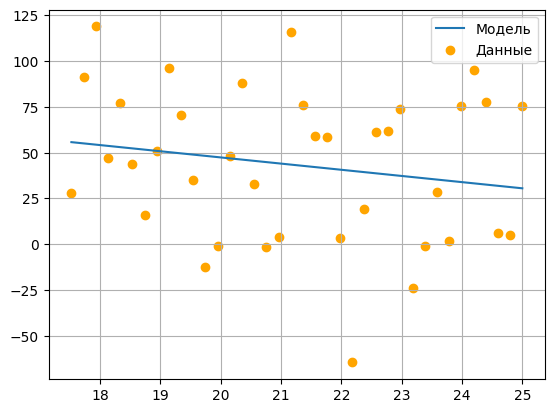

In [45]:
a32 = r32*sdy32/sdx32
b32 = say32 - a32*sax32

xt = np.linspace(min(w2), max(w2), 100)
yt2 = a32*xt+b32
plt.plot(xt, yt2)
plt.scatter(w2, z2, color = 'orange')
plt.grid()
plt.legend(['Модель', 'Данные'])
plt.show()

In [46]:
F = (sum((y1 - y2)**2 for y1, y2 in zip(yt1, z[0:m]))/
     sum((y1 - y2)**2 for y1, y2 in zip(yt2, z[-38:])))
print(F)
print(scipy.stats.f.ppf(1-0.05/2, m-1, m-1))
print(scipy.stats.f.ppf(1-0.05/2, m-1, m-1) < F) # Дисперсии не равны

0.2775183349292832
1.9241131018183546
False
